## Constants and Installations

In [ ]:
!pip3 install numpy

In [ ]:
!pip3 install scipy

In [ ]:
!pip3 install matplotlib

In [2]:
import sys
import numpy as np
import math
import scipy.sparse as sp
import matplotlib.pyplot as plt
from numpy import linalg as la

# constants
pi = np.pi

Nx = 1000
#amount of segments that graph split into 
dx = 2*pi/Nx  
k = 40  


# Graphs

### Classical Probability Graph

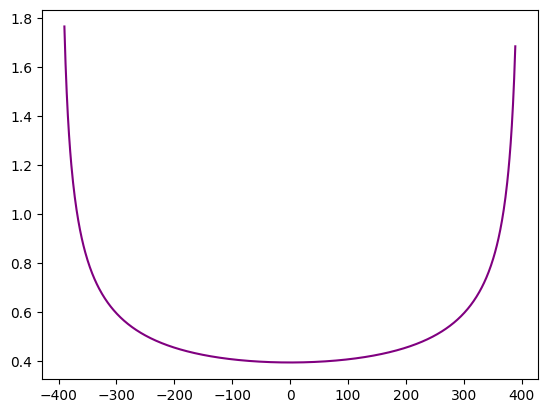

In [29]:
# constants
x1 = -390  #if they were same as A max, then the denominator would go to 0    
x2 = 390  
# From what I can tell these are the range for the points graphed on the plot
#I altered them to be able to get rid of "-500"
Amax = 400  #Max Amplitude 
pi = np.pi

#class_prob = [0.65/np.sqrt(400**2-(i-500)**2) for i  in range(x1, x2)]   #old classical prob values
class_prob = [(1/2*pi) * (1/np.sqrt(Amax**2 - i**2)) * 100 for i in range(x1, x2)]
plt.plot(range(x1, x2), class_prob, color = "purple")    # the first graph displayed in the first plot
plt.show()


### Quantum Probability Graph

In [7]:
def V(x):
    return 0.5*k*x**2   # Potential energy for k = 40 (I defined the variable)

# matrices
mat = np.zeros((Nx+1, Nx+1))

for i in range(Nx+1):
    for j in range(Nx+1): 
        if i == j: mat[i,j] = -2
        if i == j + 1: mat[i,j] = 1   
        if i == j - 1: mat[i,j] = 1 

lap = (-1/dx**2)*mat/20  # makes another matrix of same size and with the same diagonals, but different values

pot = [V((2*pi*i/Nx)-pi) for i in range(Nx+1)]  # calculating the energy of each position on matrix
pot_mat = np.zeros((Nx+1, Nx+1))  # potential matrix like mat (same size)

for i in range(Nx+1):
    for j in range(Nx+1):
        if i == j: pot_mat[i,j] = pot[i]

ham = lap + pot_mat  # hamiltonian - operator (matrix): K and U correspond to lap and pot

w,v = la.eig(ham)
idx = w.argsort()[::1]
#stores eigen values and eigen vectors in relation to another (lowest to highest energy)
eigenVectors = v[:,idx]
eigenValues = w[idx]



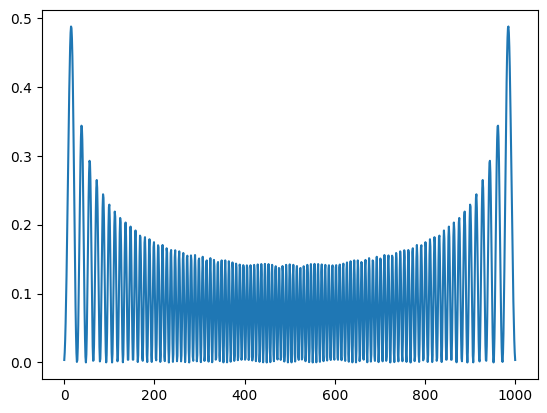

In [20]:
plt.plot((eigenVectors[:,100]**2)*100)  # Models -> Quantum walk graph, that's why it's squared
plt.show()
#Note: In QM, the eigenvalues of the Hamiltonian matrix correspond to the energy levels that are observable in experiments
#the eigenvectors correspond to the wave functions. 

### Wavefunction Graph

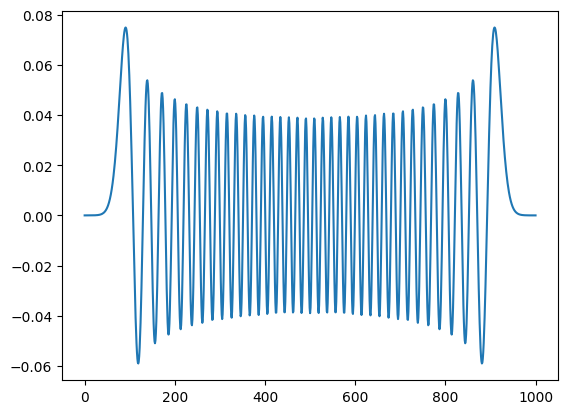

In [19]:
plt.plot(eigenVectors[:,70])  #Chose 70 oscillations to see clean version of graph
plt.show()

### Energy Graphs

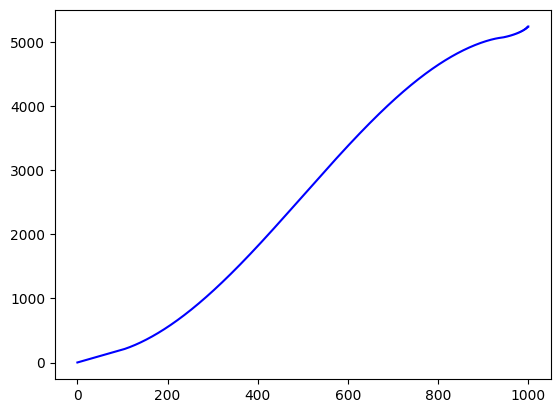

In [30]:
def V(x):
    return 0.5*k*x**2   # Potential energy for k = 40 (I defined the variable)

def V_2(x):
    return 50*x**2 + 50*(1+np.cos(2*pi*x))

eigenX = np.arange(0, 1001)   # acts as the x axis
eigenY = np.array(eigenValues)    # plots eigenValues (correspond to energies) as the y values
#print(eigenValues)
plt.plot(eigenX, eigenY, color = "blue")  #used the Eigenvalues from idx for quantum energies
plt.show()


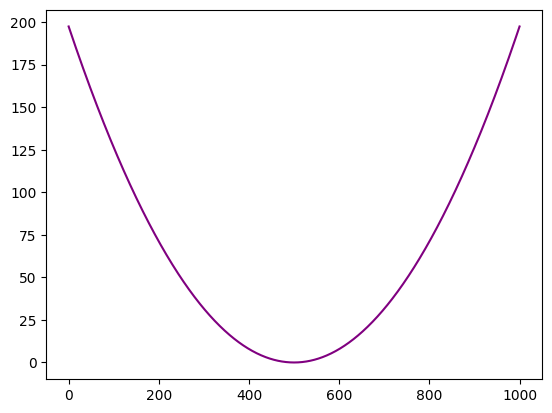

In [31]:
x = np.arange(0, 1001)  # has to coorelate to amount of terms in pot, apparently
y = np.array(pot)
#print(pot)

plt.plot(x, y, color = "purple")    # plots V(x) with pot values for spring oscillation
plt.show()

### Second Energy Graph?? (More general one)

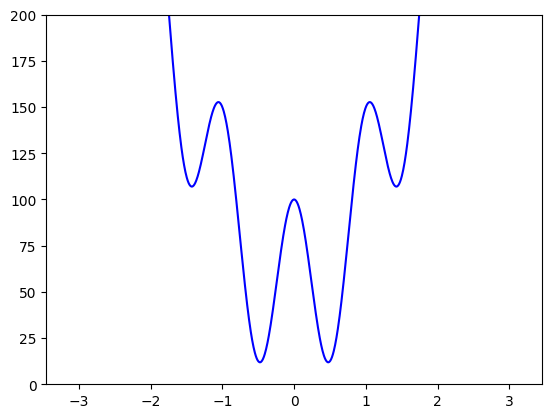

In [5]:
def V_2(x):
    return 50*x**2 + 50*(1+np.cos(2*pi*x))
# method for any potential, allows for more complicated potentials

phi_vals = [2*pi*i/Nx-pi for i in range(Nx + 1)]   # represents the phase of the particle
V2_vals = [V_2(phi) for phi in phi_vals]   #calculates the pot. energy for each phase?? (If I'm interpreting correctly)
plt.plot(phi_vals, V2_vals, color = "blue")       #plots phi values as x and V2 vals as y
plt.ylim(0, 200)           # originally from -50 to 200 
plt.show()